# 0.0. Imports
---

In [1]:
import pandas as pd
import sqlite3

from sqlite3 import Error

# 1.0. Load Files
---

In [24]:
customers = pd.read_csv( 'brazilian-ecommerce/olist_customers_dataset.csv' )
geolocations = pd.read_csv( 'brazilian-ecommerce/olist_geolocation_dataset.csv' )
order_items = pd.read_csv( 'brazilian-ecommerce/olist_order_items_dataset.csv' )
payments = pd.read_csv( 'brazilian-ecommerce/olist_order_payments_dataset.csv' )
reviews = pd.read_csv( 'brazilian-ecommerce/olist_order_reviews_dataset.csv' )
orders = pd.read_csv( 'brazilian-ecommerce/olist_orders_dataset.csv' )
products = pd.read_csv( 'brazilian-ecommerce/olist_products_dataset.csv' )
sellers = pd.read_csv( 'brazilian-ecommerce/olist_sellers_dataset.csv' )
product_name_translation = pd.read_csv( 'brazilian-ecommerce/product_category_name_translation.csv' )

## 1.1. Merge Files

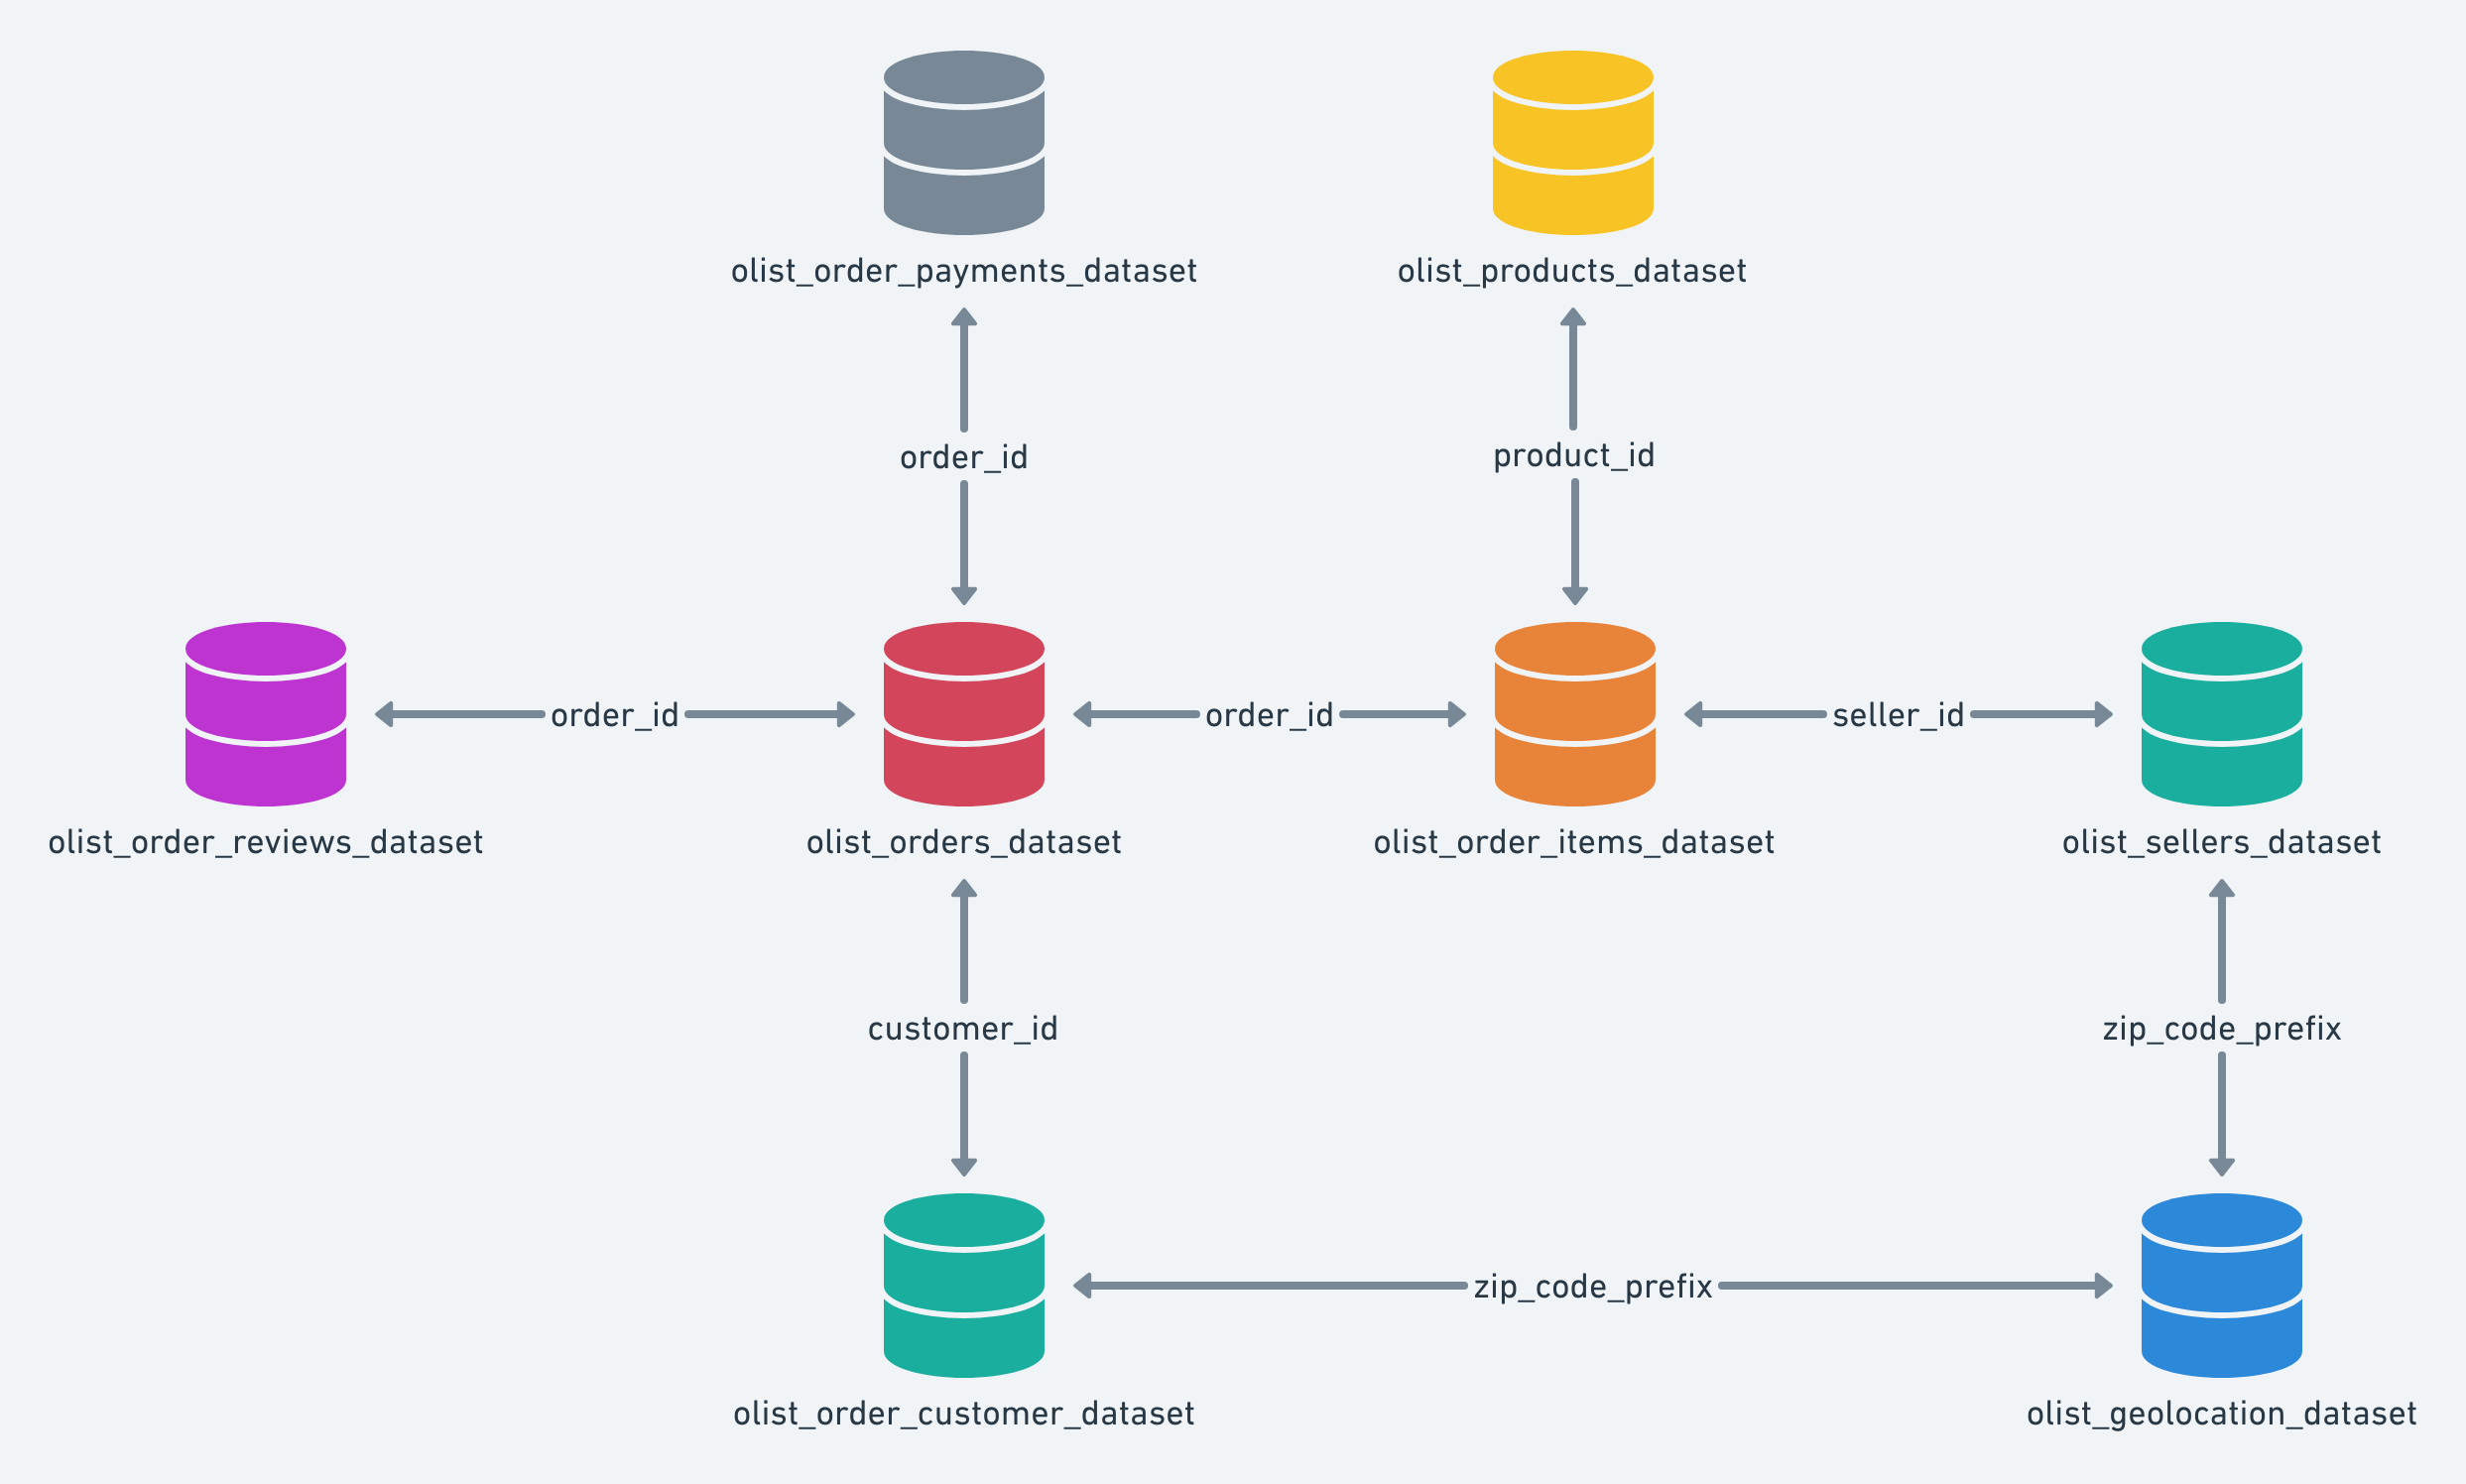

In [23]:
from IPython.display import Image
Image( 'olist_MER.png' )

In [29]:
# Orders x Order Items
df1 = pd.merge( orders, order_items, how='inner', on='order_id' )

# ... x Reviews
df2 = pd.merge( df1, reviews, how='inner', on='order_id' )

# ... x Sellers
df3 = pd.merge( df2, sellers, how='inner', on='seller_id' )

# ... x Products
df4 = pd.merge( df3, products, how='inner', on='product_id' )

# ... x Payments
df5 = pd.merge( df4, payments, how='inner', on='order_id' )

# ... x Customers
df6 = pd.merge( df5, customers, how='inner', on='customer_id' )

# ... x Customers
df7 = pd.merge( df6, geolocations, how='inner', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix' )

In [2]:
database = '/Users/meigarom/repos/SejaUmDataScientist/olistEcommerce.db'

In [3]:
# create a database connection
try:
    conn = sqlite3.connect( database )
except Error as e:
    print( e )

In [4]:
df = pd.read_sql_query( 'select * from orders', conn )

In [5]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
cur = conn.cursor()

In [10]:
results = cur.execute( 'select * from orders limit 10;' ).fetchall()

In [11]:
results

[('e481f51cbdc54678b7cc49136f2d6af7',
  '9ef432eb6251297304e76186b10a928d',
  'delivered',
  '2017-10-02 10:56:33',
  '2017-10-02 11:07:15',
  '2017-10-04 19:55:00',
  '2017-10-10 21:25:13',
  '2017-10-18 00:00:00'),
 ('53cdb2fc8bc7dce0b6741e2150273451',
  'b0830fb4747a6c6d20dea0b8c802d7ef',
  'delivered',
  '2018-07-24 20:41:37',
  '2018-07-26 03:24:27',
  '2018-07-26 14:31:00',
  '2018-08-07 15:27:45',
  '2018-08-13 00:00:00'),
 ('47770eb9100c2d0c44946d9cf07ec65d',
  '41ce2a54c0b03bf3443c3d931a367089',
  'delivered',
  '2018-08-08 08:38:49',
  '2018-08-08 08:55:23',
  '2018-08-08 13:50:00',
  '2018-08-17 18:06:29',
  '2018-09-04 00:00:00'),
 ('949d5b44dbf5de918fe9c16f97b45f8a',
  'f88197465ea7920adcdbec7375364d82',
  'delivered',
  '2017-11-18 19:28:06',
  '2017-11-18 19:45:59',
  '2017-11-22 13:39:59',
  '2017-12-02 00:28:42',
  '2017-12-15 00:00:00'),
 ('ad21c59c0840e6cb83a9ceb5573f8159',
  '8ab97904e6daea8866dbdbc4fb7aad2c',
  'delivered',
  '2018-02-13 21:18:39',
  '2018-02-13 22